In [1]:
import pandas as pd
df = pd.read_csv("C:\\Users\\PC-LENOVO\\Desktop\\ExcelR Assginments\\Decision Trees\\Fraud_check.csv")
df.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [3]:
df.shape  #(600, 6)

(600, 6)

In [4]:
# Create the target variable
df["Taxable.Income"] = df["Taxable.Income"].apply(lambda x: "Risky" if x <= 30000 else "Good")
df["Taxable.Income"]

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [5]:
#EDA----->EXPLORATORY DATA ANALYSIS
#BOXPLOT AND OUTLIERS CALCULATION #
import seaborn as sns
import matplotlib.pyplot as plt
data = df.iloc[:,3:5]

C:\Users\PC-LENOVO\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


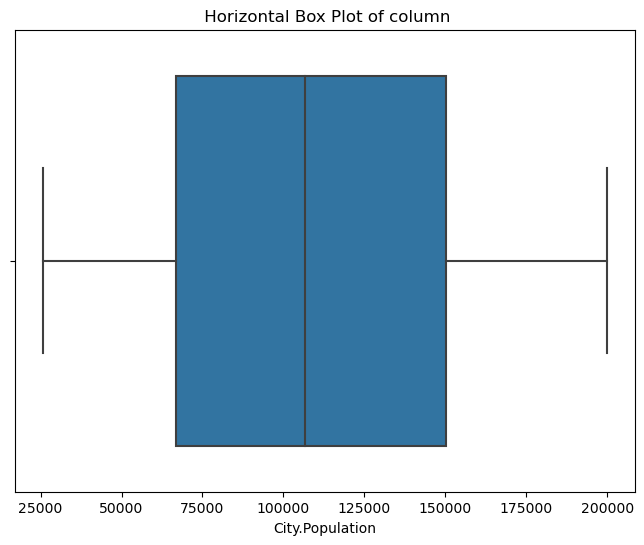

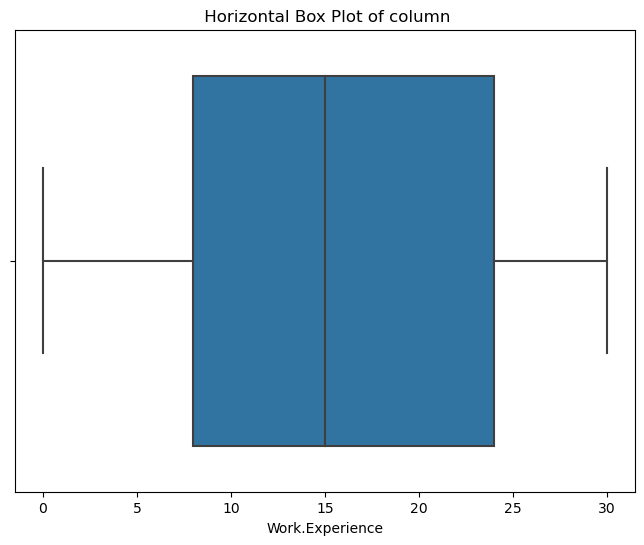

In [6]:
for column in data:
    plt.figure(figsize=(8, 6))  
    sns.boxplot(x=df[column])
    plt.title(" Horizontal Box Plot of column")
    plt.show()

In [7]:
#Removing the outliers
df1 = df.iloc[:,3:5]
df1

,City.Population,Work.Experience
0,50047,10
1,134075,18
2,160205,30
3,193264,15
4,27533,28
...,...,...
595,39492,7
596,55369,2
597,154058,0
598,180083,17


In [8]:
from scipy import stats
# Define a threshold for Z-score (e.g., Z-score greater than 3 or less than -3 indicates an outlier)
z_threshold = 3

In [9]:
# Calculate the Z-scores for each column in the DataFrame
import numpy as np
z_scores = np.abs(stats.zscore(df1))

In [10]:
# Create a mask to identify rows with outliers
outlier_mask = (z_scores > z_threshold).any(axis=1)

In [11]:
# Remove rows with outliers from the DataFrame
df = df[~outlier_mask]

In [12]:
df.shape  #(600, 6)

(600, 6)

array([[<AxesSubplot:title={'center':'City.Population'}>,
        <AxesSubplot:title={'center':'Work.Experience'}>]], dtype=object)

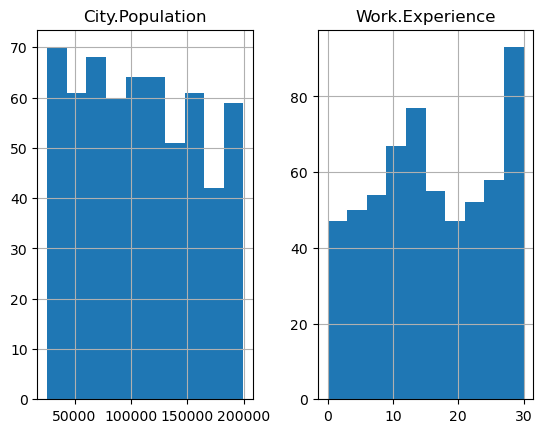

In [13]:
# Now, df contains the data with outliers removed

#HISTOGRAM BUILDING, SKEWNESS AND KURTOSIS CALCULATION #
df.hist()

In [14]:
df.skew()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_2276\1665899112.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.skew()


City.Population    0.125009
Work.Experience    0.018529
dtype: float64

In [15]:
df.kurt()

C:\Users\PC-LENOVO\AppData\Local\Temp\ipykernel_2276\1257127604.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.kurt()


City.Population   -1.120154
Work.Experience   -1.167524
dtype: float64

In [16]:
df.describe()

,City.Population,Work.Experience
count,600.000000,600.000000
mean,108747.368333,15.558333
std,49850.075134,8.842147
min,25779.000000,0.000000
25%,66966.750000,8.000000
50%,106493.500000,15.000000
75%,150114.250000,24.000000
max,199778.000000,30.000000


In [17]:
#Label Encoding # Encode the "Undergrad," "Marital.Status," and "Urban" categorical variables
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [18]:
df["Undergrad"] = LE.fit_transform(df["Undergrad"])

In [19]:
df["Marital.Status"] = LE.fit_transform(df["Marital.Status"])

In [20]:
df["Urban"] = LE.fit_transform(df["Urban"])

In [21]:
# Split the data into features (X) and the target variable (y)
X = df.drop("Taxable.Income", axis=1)
X

,Undergrad,Marital.Status,City.Population,Work.Experience,Urban
0,0,2,50047,10,1
1,1,0,134075,18,1
2,0,1,160205,30,1
3,1,2,193264,15,1
4,0,1,27533,28,0
...,...,...,...,...,...
595,1,0,39492,7,1
596,1,0,55369,2,1
597,0,0,154058,0,1
598,1,1,180083,17,0


In [22]:
Y = df["Taxable.Income"]
Y

0      Good
1      Good
2      Good
3      Good
4      Good
       ... 
595    Good
596    Good
597    Good
598    Good
599    Good
Name: Taxable.Income, Length: 600, dtype: object

In [23]:
#Data Partition
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=123)

In [24]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

In [25]:
DT = DecisionTreeClassifier(criterion='gini',max_depth=9)
DT.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=9)

In [26]:
Y_pred_train = DT.predict(X_train)
Y_pred_train

array(['Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Risky',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky'

In [27]:
Y_pred_test = DT.predict(X_test)
Y_pred_test

array(['Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', 'Good',
       'Good', 'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Risky', 'Risky', 'Good', 'Good', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Risky', 'Good', 'Risky', 'Good', 'Good', 'Good',
       'Good', 'Good', 'Good', 'Good', 'Good', 'Good', 'Risky', '

In [28]:
#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))  #ac1 = 0.893
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Training Accuracy Score:",ac2.round(3))  #ac2 = 0.74

Training Accuracy Score: 0.893
Training Accuracy Score: 0.74


In [30]:
!pip install graphviz

     -------------------------------------- 47.0/47.0 kB 593.5 kB/s eta 0:00:00


In [31]:
#Graphviz
from sklearn import tree
import graphviz

In [32]:
dot_data = tree.export_graphviz(DT,filled= True,rounded=True,special_characters=True)
graph = graphviz.Source(dot_data)

In [33]:
print("Number of nodes",DT.tree_.node_count)    #Nodes = 127
print("Level of depth",DT.tree_.max_depth)      #Level of depth = 9

Number of nodes 127
Level of depth 9


In [34]:
#Validation Set Approach
training_accuracy = []
test_accuracy = []

In [35]:
for i in range(1,100):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size = 0.75,random_state=i)
    DT = DecisionTreeClassifier(criterion='gini',max_depth=9)
    DT.fit(X_train,Y_train)
    Y_pred_train = DT.predict(X_train)
    Y_pred_test = DT.predict(X_test)
    training_accuracy.append(accuracy_score(Y_train,Y_pred_train))
    test_accuracy.append(accuracy_score(Y_test,Y_pred_test))

In [36]:
import numpy as np
print("Average Training Accuracy:",np.mean(training_accuracy).round(3)) #Average Training Accuracy: 0.881
print("Average Test Accuracy:",np.mean(test_accuracy).round(3))         #Average Test Accuracy: 0.713

Average Training Accuracy: 0.881
Average Test Accuracy: 0.713


In [37]:
#Parallel Ensemble Methods
#Bagging
from sklearn.ensemble import BaggingClassifier

In [38]:
Bag = BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                        n_estimators=100,
                        max_samples=0.6,
                        max_features=0.7,
                        random_state=123)    

In [39]:
Bag.fit(X_train,Y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(max_depth=7),
                  max_features=0.7, max_samples=0.6, n_estimators=100,
                  random_state=123)

In [40]:
Y_pred_train = Bag.predict(X_train)
Y_pred_test = Bag.predict(X_test)

In [41]:
#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))   #Training Accuracy Score: 0.8
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",ac2.round(3))   #Test Accuracy Score: 0.793

Training Accuracy Score: 0.8
Test Accuracy Score: 0.793


In [42]:
#Ada Boost (Adaptive Boosting Techniques)
from sklearn.ensemble import AdaBoostClassifier

In [43]:
ABC = AdaBoostClassifier(base_estimator=DecisionTreeClassifier(),
                         n_estimators=100,
                         learning_rate=0.1)

In [44]:
ABC.fit(X_train,Y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=0.1,
                   n_estimators=100)

In [45]:
Y_pred_train = ABC.predict(X_train)
Y_pred_test = ABC.predict(X_test)

In [47]:
#Metrices
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_train,Y_pred_train)
print("Training Accuracy Score:",ac1.round(3))   #Training Accuracy Score:1.0 
ac2 = accuracy_score(Y_test,Y_pred_test)
print("Test Accuracy Score:",ac2.round(3))   #Test Accuracy Score: 0.667

Training Accuracy Score: 1.0
Test Accuracy Score: 0.667


In [48]:
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [49]:
# Visualizing Boxplots
data = df.iloc[:, 3:5]

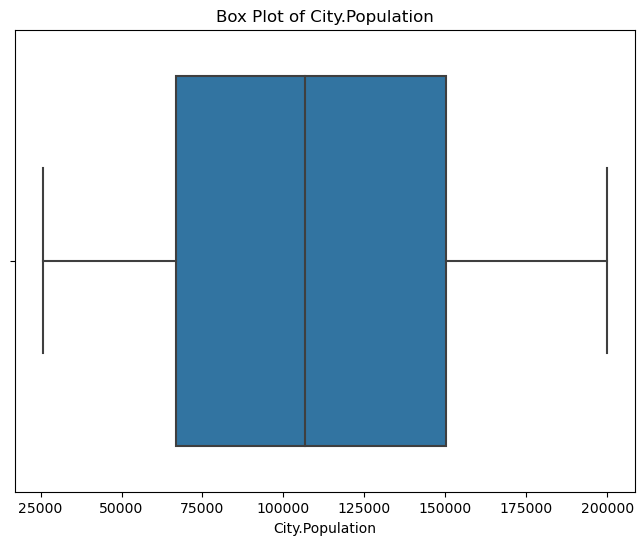

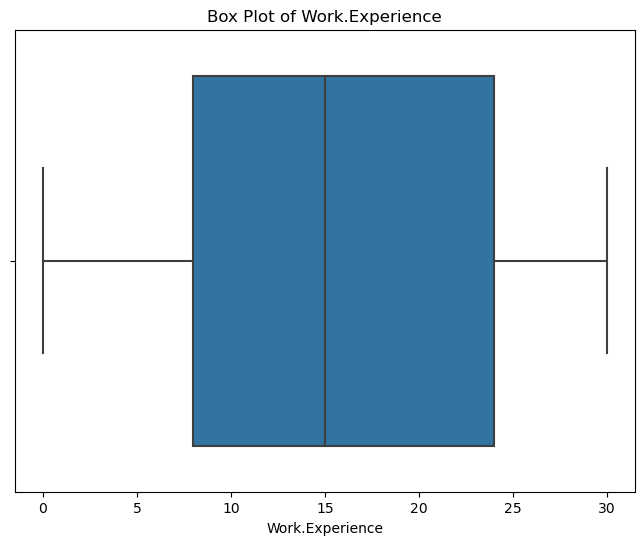

In [50]:
for column in data:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column])
    plt.title(f"Box Plot of {column}")
    plt.show()

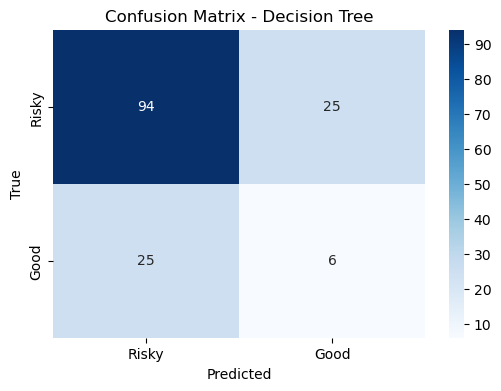

In [51]:
# Confusion Matrix for Decision Tree
conf_matrix_dt = confusion_matrix(Y_test, Y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_dt, annot=True, fmt='d', cmap='Blues', xticklabels=['Risky', 'Good'], yticklabels=['Risky', 'Good'])
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [52]:
# Feature Importance Plot for Decision Tree
feature_importance = DT.feature_importances_
features = X.columns

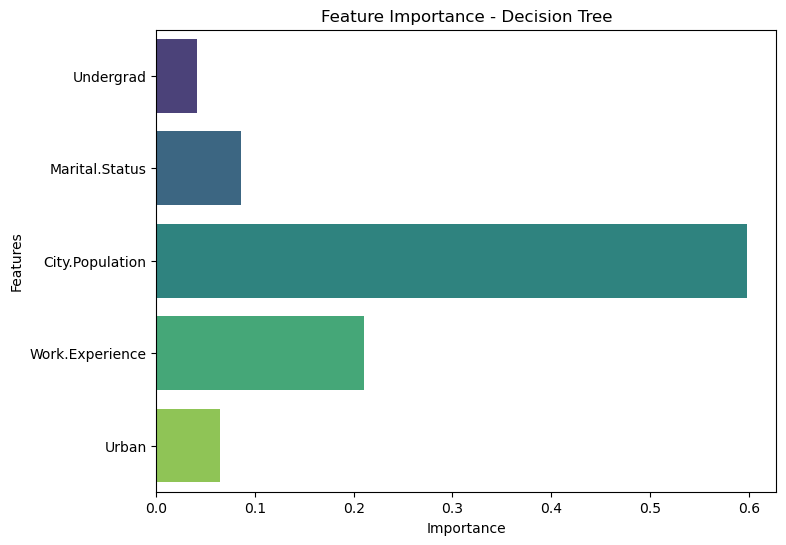

In [53]:
plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importance, y=features, orient='h', palette='viridis')
plt.title('Feature Importance - Decision Tree')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

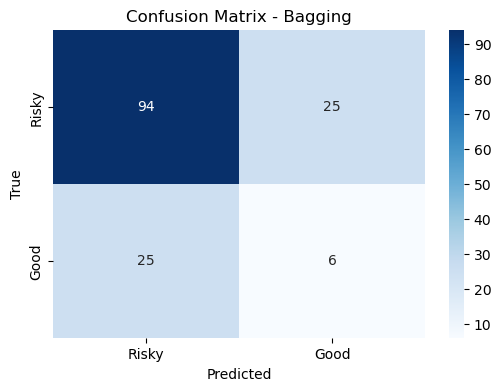

In [54]:
# The model is giving high importance to the "City.Population" variable,
# indicating that the population size of the city where an individual resides is crucial in predicting their taxable income status.

# Confusion Matrix for Bagging
conf_matrix_bag = confusion_matrix(Y_test, Y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_bag, annot=True, fmt='d', cmap='Blues', xticklabels=['Risky', 'Good'], yticklabels=['Risky', 'Good'])
plt.title('Confusion Matrix - Bagging')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

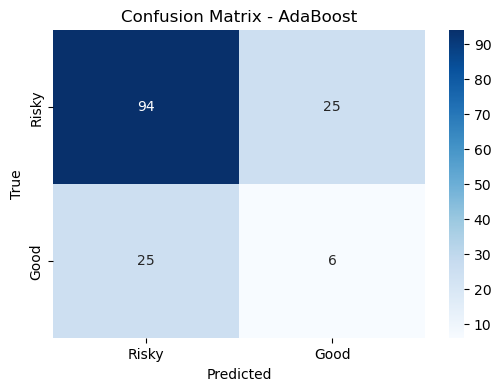

In [55]:
# Confusion Matrix for AdaBoost
conf_matrix_ada = confusion_matrix(Y_test, Y_pred_test)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_ada, annot=True, fmt='d', cmap='Blues', xticklabels=['Risky', 'Good'], yticklabels=['Risky', 'Good'])
plt.title('Confusion Matrix - AdaBoost')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# The decision tree model shows a good fit to the training data but might be slightly overfitting.
# Bagging has increased the model's stability and slightly improved test accuracy compared to the standalone decision tree.
# AdaBoost achieves perfect training accuracy, but it seems to struggle with generalization to the test set, 
# indicating potential overfitting.